<h1 style="font-size:3rm;color:green;">Health Data Jupyter Notebook</h1>
This notebook contains Kim's Apple Health Data for 2 years. Time period of June 1, 2020 - May 31, 2022.

<img src=kim-health-data.png>

<h3 style="font-size:3rm;color:blue;">Import Health Data</h3>
Use of Pandas to import .csv file/data. Also import Seaborn and Numpy for additional data analysis.

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
health_data_2year = pd.read_csv("Export_ActiveEnergyBurned.csv")
health_data_2year.head()

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
0,2020-06,32562.605,519.0,70145.420,1771.0,40.470,83.686,57.467,5448.0,342345.273,108.483
1,2020-07,33837.342,506.0,72420.122,2026.0,98.171,85.217,58.065,5168.0,362907.978,108.806
2,2020-08,33936.205,480.0,70660.916,2185.0,150.113,85.162,60.188,4939.0,300141.779,102.565
3,2020-09,31957.453,477.0,68383.441,1904.0,232.420,88.482,60.733,5772.0,398573.937,114.017
4,2020-10,26645.052,470.0,67709.706,1455.0,69.000,76.347,57.677,3969.0,242276.382,97.016


In [42]:
#Object class
type(health_data_2year)

pandas.core.frame.DataFrame

<h3 style="font-size:3rm;color:orange;">Clean Data</h3>

In [43]:
#Clean data file to remove unnecessary columns related to stand time, stand time in hours and flights of stairs climbed.
health_data_2year_dataframe = health_data_2year.drop(columns=['Apple Watch stand hours(hr)','Flights climbed(count)','Stand time(min)'])
health_data_2year_dataframe.head()

,Date,Active energy burned(Cal),Basal energy burned(Cal),Exercise time(min),Heart rate(count/min),Resting heart rate(count/min),Step count(count),Walking heart rate average(count/min)
0,2020-06,32562.605,70145.420,1771.0,83.686,57.467,342345.273,108.483
1,2020-07,33837.342,72420.122,2026.0,85.217,58.065,362907.978,108.806
2,2020-08,33936.205,70660.916,2185.0,85.162,60.188,300141.779,102.565
3,2020-09,31957.453,68383.441,1904.0,88.482,60.733,398573.937,114.017
4,2020-10,26645.052,67709.706,1455.0,76.347,57.677,242276.382,97.016


In [44]:
#Data classes in data frame
health_data_2year_dataframe.dtypes

Date                                      object
Active energy burned(Cal)                float64
Basal energy burned(Cal)                 float64
Exercise time(min)                       float64
Heart rate(count/min)                    float64
Resting heart rate(count/min)            float64
Step count(count)                        float64
Walking heart rate average(count/min)    float64
dtype: object

In [117]:
#Transform data to round all numbers to .0
health_data_2year_dataframe = health_data_2year.round()
health_data_2year_dataframe.head()

,Date,Active energy burned(Cal),Apple Watch stand hours(hr),Basal energy burned(Cal),Exercise time(min),Flights climbed(count),Heart rate(count/min),Resting heart rate(count/min),Stand time(min),Step count(count),Walking heart rate average(count/min)
0,2020-06,32563.0,519.0,70145.0,1771.0,40.0,84.0,57.0,5448.0,342345.0,108.0
1,2020-07,33837.0,506.0,72420.0,2026.0,98.0,85.0,58.0,5168.0,362908.0,109.0
2,2020-08,33936.0,480.0,70661.0,2185.0,150.0,85.0,60.0,4939.0,300142.0,103.0
3,2020-09,31957.0,477.0,68383.0,1904.0,232.0,88.0,61.0,5772.0,398574.0,114.0
4,2020-10,26645.0,470.0,67710.0,1455.0,69.0,76.0,58.0,3969.0,242276.0,97.0


<h3 style="font-size:3rm;color:orange;">Analyze Data - Active Energy Burned (calories)</h3>
Active Energy Burned is an estimate of the calories you burn over the course of a time period through exercise or other activity.

In [46]:
#Isolate monthly date range and monthly active energy burned data.
round(pd.pivot_table(health_data_2year, index=["Date"], values=["Active energy burned(Cal)"], aggfunc=np.sum))

,Active energy burned(Cal)
Date,
2020-06,32563.0
2020-07,33837.0
2020-08,33936.0
2020-09,31957.0
2020-10,26645.0
2020-11,26924.0
2020-12,28943.0
2021-01,24709.0
2021-02,24952.0


In [47]:
#Calculate the median of Active energy burned(calories). Save information as a varisable 'median_active_eng_burned'.
median_active_eng_burned = health_data_2year_dataframe['Active energy burned(Cal)'].median()
print(median_active_eng_burned)

26020.5


In [48]:
#Find the minimum of Active energy burned(calories). Save information as a variable 'min_active_eng_burned'.
min_active_eng_burned = health_data_2year_dataframe['Active energy burned(Cal)'].min()
print(min_active_eng_burned)

21615.0


In [49]:
#Find the maximum of Active energy burned(calories). Save informaiton as a variable 'max_active_eng_burned'.
max_active_eng_burned = health_data_2year_dataframe['Active energy burned(Cal)'].max()
print(max_active_eng_burned)

33936.0


Use of <b>Matplotlib</b> to create Plot graph.

In [50]:
from matplotlib import pyplot as plt

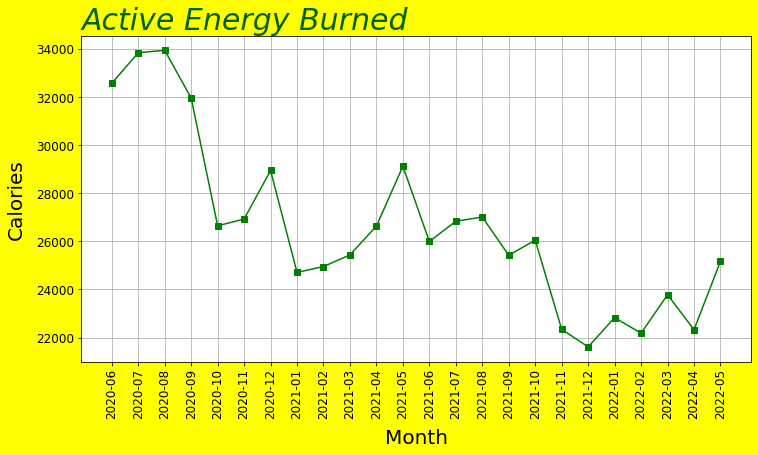

In [126]:
#Plot the 2-year period (in months) of Active Energy Burned (calories) with custom chart formatting.
plt.figure(figsize = (12, 6), facecolor = "yellow")
plt.plot(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Active energy burned(Cal)'], marker = 's', color = "green")
plt.xlabel("Month", fontsize = 20, labelpad=10)
plt.ylabel("Calories", fontsize = 20, labelpad=10)
plt.grid()
plt.xticks(rotation="vertical")
plt.tick_params(axis = "both", labelsize = "large")
plt.title("Active Energy Burned", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()

<h3 style="font-size: 2rm;color:green;">Interpretation of Active Energy Burned data:</h3>
During the 2-year period of June 2021 - June 2022, the min calories burned were 21,615. The median calories burned were 26,020 and the max calories burned were 33,936. 

<h3 style="font-size:3rm;color:orange;">Analyze Data - Basal Energy Burned (calories)</h3>
Basal Energy Burned is an estimate of the calories you burn over the course of a time period through resting energy. Resting energy is the energy that the body burns to maintain its normal, resting state. The body uses this energy to perform basic functions like breathing, circulating blood, and managing the growth and maintenance of cells. (Reference: developer.apple.com/documentation/healthkit/...)

In [52]:
#Isolate monthly date range and monthly basal energy burned data.
round(pd.pivot_table(health_data_2year, index=["Date"], values=["Basal energy burned(Cal)"], aggfunc=np.sum))

,Basal energy burned(Cal)
Date,
2020-06,70145.0
2020-07,72420.0
2020-08,70661.0
2020-09,68383.0
2020-10,67710.0
2020-11,66333.0
2020-12,70655.0
2021-01,68886.0
2021-02,62237.0


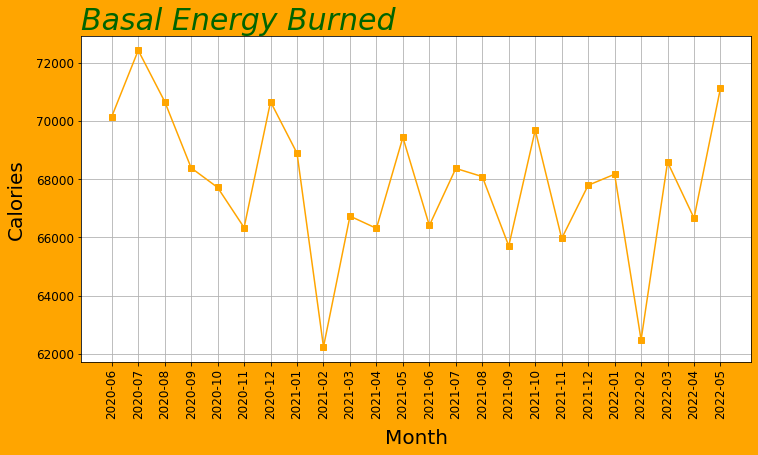

In [116]:
#Plot the 2-year period (in months) of Basal Energy Burned (calories) with custom chart formatting.
plt.figure(figsize = (12, 6), facecolor = "orange")
plt.plot(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Basal energy burned(Cal)'], marker = 's', color = "orange")
plt.xlabel("Month", fontsize = 20, labelpad=10)
plt.ylabel("Calories", fontsize = 20, labelpad=10)
plt.grid()
plt.xticks(rotation="vertical")
plt.tick_params(axis = "both", labelsize = "large")
plt.title("Basal Energy Burned", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()

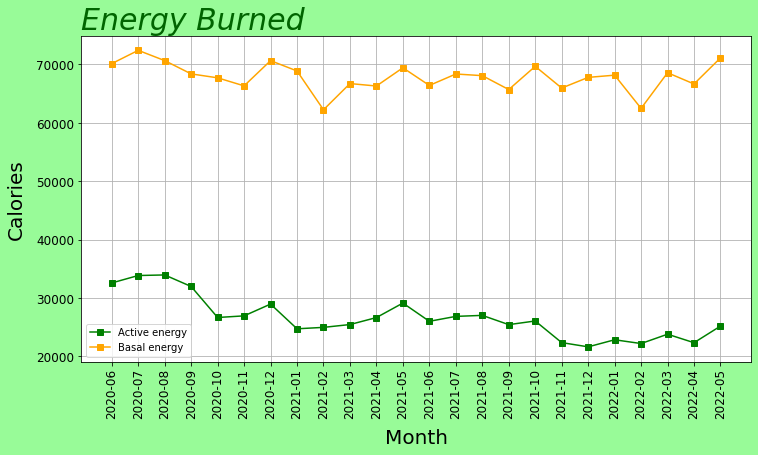

In [102]:
#Plot the 2-year period (in months) of Active Energy Burned (calories) and Basal Energy Burned (calories) with custom chart formatting.
plt.figure(figsize = (12, 6), facecolor = "palegreen")
plt.plot(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Active energy burned(Cal)'], marker = 's', color = "green")
plt.plot(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Basal energy burned(Cal)'], marker = 's', color = "orange")
plt.legend (["Active energy","Basal energy"])
plt.xlabel("Month", fontsize = 20, labelpad=10)
plt.ylabel("Calories", fontsize = 20, labelpad=10)
plt.grid()
plt.xticks(rotation="vertical")
plt.tick_params(axis = "both", labelsize = "large")
plt.title("Energy Burned", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()

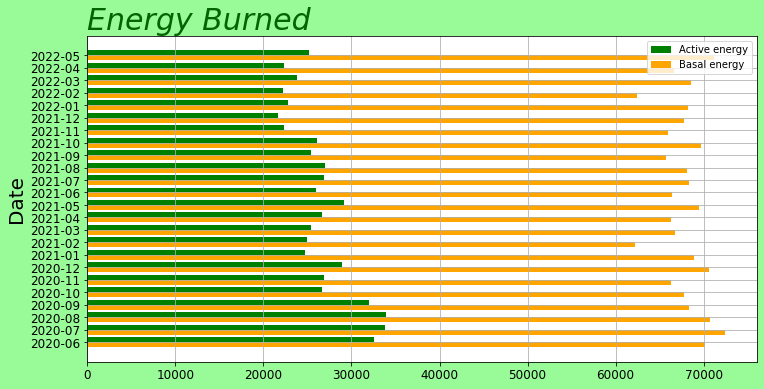

In [115]:
#Plot the 2-year period (in months) of Active Energy Burned (calories) and Basal Energy Burned (calories) in a grouped bar chart with custom chart formatting.
plt.figure(figsize = (12, 6), facecolor = "palegreen")
plt.barh(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Active energy burned(Cal)'], color = "green",
    align = "edge", height = 0.4)
plt.barh(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Basal energy burned(Cal)'], color = "orange",
    align = "edge", height = -0.4)
plt.legend (["Active energy","Basal energy"])
plt.ylabel("Date", fontsize = 20)
plt.tick_params(axis = "both", labelsize = "large")
plt.grid()
plt.title("Energy Burned", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()

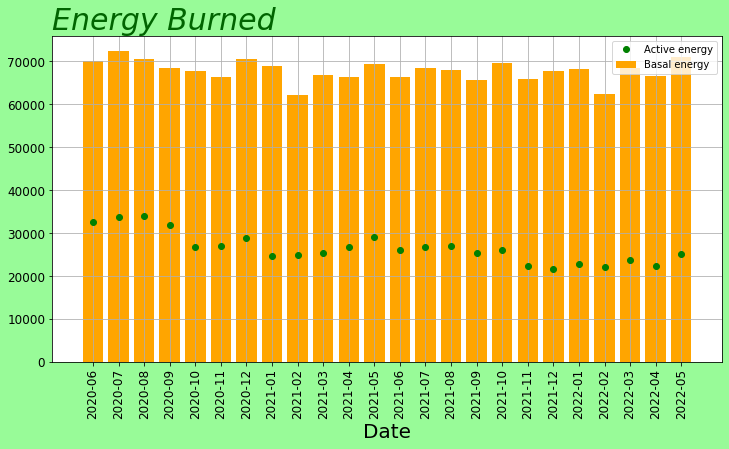

In [114]:
#Plot the 2-year period (in months) of Active Energy Burned (calories) and Basal Energy Burned (calories) in a combination plot with custom chart formatting.
plt.figure(figsize = (12, 6), facecolor = "palegreen")
plt.plot_date(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Active energy burned(Cal)'], color = "green",
    linewidth = 10)
plt.bar(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Basal energy burned(Cal)'], color = "orange")
plt.legend (["Active energy","Basal energy"])
plt.xlabel ("Date", fontsize = 20)
plt.xticks(rotation="vertical")
plt.tick_params(axis = "both", labelsize = "large")
plt.grid()
plt.title("Energy Burned", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()

<h3 style="font-size:3rm;color:orange;">Analyze Data - Exercise Time (minutes)</h3>


In [ ]:
#Isolate monthly date range and monthly exercise time data.
round(pd.pivot_table(health_data_2year, index=["Date"], values=["Exercise time(min)"], aggfunc=np.sum))

,Exercise time(min)
Date,
2020-06,1771.0
2020-07,2026.0
2020-08,2185.0
2020-09,1904.0
2020-10,1455.0
2020-11,1222.0
2020-12,1313.0
2021-01,1193.0
2021-02,1147.0


Use of <b>Matplotlib</b> to create scatter graph.

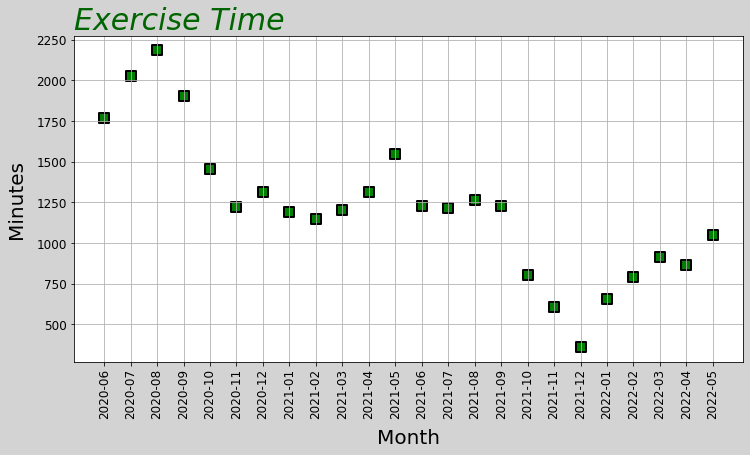

In [113]:
#Plot the 2-year period (in months) of Exercise Time (minutes) in scatterplot with custom chart formatting
plt.figure(figsize = (12, 6), facecolor = "lightgrey")
plt.scatter(health_data_2year_dataframe['Date'], health_data_2year_dataframe['Exercise time(min)'], 
    marker = "s", edgecolors = "black",
    facecolors = "green", linewidths = 2, s = 100)
plt.xlabel("Month", fontsize = 20, labelpad=10)
plt.ylabel("Minutes", fontsize = 20, labelpad=10)
plt.tick_params(axis = "both", labelsize = "large")
plt.grid()
plt.xticks(rotation="vertical")
plt.title("Exercise Time", fontsize=30, loc = "left", fontstyle = "oblique", color = "darkgreen")
plt.show()

In [ ]:
#Calculate the sum of exercise time (minutes). Save information as a variable 'sum_exercise_time'.
sum_exercise_time = health_data_2year_dataframe['Exercise time(min)'].sum()
print(sum_exercise_time)

29256.0


In [ ]:
#Convert exercise time sum from minutes to hours.
hours_exercise_time = sum_exercise_time/60
print(hours_exercise_time)

487.6


In [ ]:
#Convert exercise time sum from hours to days.
days_exercise_time = hours_exercise_time/24
print(days_exercise_time)

20.316666666666666


<h3 style="font-size: 2rm;color:green;">Interpretation of Exercise time data:</h3>
During the 2-year period of June 2021 - June 2022, the total exercise time was 29,256 minutes which is equal to 487.6 hours, or a total of 20 days.

<h3 style="font-size:3rm;color:orange;">Compare Data - Heart Rate vs. Resting Heart Rate</h3>

In [ ]:
#Isolate monthly date range, heart rate and resting heart rate data.
round(pd.pivot_table(health_data_2year, index=["Date"], values=["Heart rate(count/min)","Resting heart rate(count/min)"], aggfunc=np.sum))

,Heart rate(count/min),Resting heart rate(count/min)
Date,,
2020-06,84.0,57.0
2020-07,85.0,58.0
2020-08,85.0,60.0
2020-09,88.0,61.0
2020-10,76.0,58.0
2020-11,78.0,59.0
2020-12,78.0,60.0
2021-01,74.0,56.0
2021-02,82.0,65.0


In [ ]:
#Create new variable "rateCompare" which consists of only three areas of data from original dataframe.
rateCompare = pd.pivot_table(health_data_2year, index=["Date"], values=["Heart rate(count/min)","Resting heart rate(count/min)"], aggfunc=np.sum)
rateCompare.head()

,Heart rate(count/min),Resting heart rate(count/min)
Date,,
2020-06,83.686,57.467
2020-07,85.217,58.065
2020-08,85.162,60.188
2020-09,88.482,60.733
2020-10,76.347,57.677


In [ ]:
#Confirm my new variable "rateCompare" is indeed a DataFrame
type(rateCompare)

pandas.core.frame.DataFrame

<AxesSubplot:title={'center':'Heart Rate vs. Resting Heart Rate'}, xlabel='Date'>

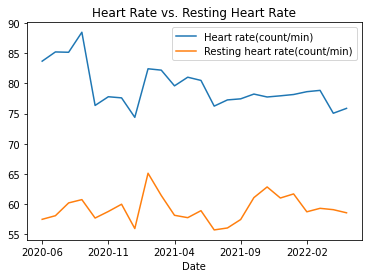

In [ ]:
#Visualize rateCompare
rateCompare.plot(kind="line",title="Heart Rate vs. Resting Heart Rate")

## The End :)